In [1]:
import sys
sys.path.append('/home/599/dbi599/unseen/unseen')

import matplotlib.pyplot as plt
import geopandas as gp
import regionmask
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)
from shapely.geometry import Polygon

import fileio

## Read data

### ABARES regions

The Australian Bureau of Agricultural and Resource Economics and Sciences (ABARES) defines a set of [Australian broadacre zones and regions](https://apps.agriculture.gov.au/agsurf/regions.html). The relevant shapefiles can be downloaded from:  
https://www.agriculture.gov.au/abares/research-topics/surveys/farm-survey-data

Here's an image showing how vegetation maps onto the wheat/sheep region:  
https://www.agriculture.gov.au/sites/default/files/images/ag-snapshot-2021-2-01.jpg

In [2]:
abares = gp.read_file('/home/599/dbi599/unseen/shapefiles/abares_regions.zip')
abares

,aagis,class,name,zone,geometry
0,111,111,NSW Far West,Pastoral,"POLYGON ((146.37539 -28.99878, 146.94501 -28.9..."
1,121,121,NSW North West Slopes and Plains,Wheat Sheep,"POLYGON ((150.29716 -28.54252, 150.29783 -28.5..."
2,122,122,NSW Central West,Wheat Sheep,"POLYGON ((149.02819 -30.60890, 149.05246 -30.6..."
3,123,123,NSW Riverina,Wheat Sheep,"POLYGON ((145.34428 -32.68249, 145.33056 -32.7..."
4,131,131,NSW Tablelands (Northern Central and Southern),High Rainfall,"POLYGON ((152.51672 -28.25466, 152.51610 -28.2..."
5,132,132,NSW Coastal,High Rainfall,"MULTIPOLYGON (((150.05118 -37.26355, 150.05099..."
6,221,221,VIC Mallee,Wheat Sheep,"POLYGON ((140.96768 -33.98983, 140.96827 -33.9..."
7,222,222,VIC Wimmera,Wheat Sheep,"POLYGON ((141.99493 -35.64500, 141.99495 -35.6..."
8,223,223,VIC Central North,Wheat Sheep,"POLYGON ((145.53410 -35.80522, 145.53390 -35.8..."
9,231,231,VIC Southern and Eastern Victoria,High Rainfall,"MULTIPOLYGON (((146.29518 -39.15886, 146.29331..."


### My custom regions

In [50]:
sw = Polygon([(115, -28.314607),
              (115, -32.359551),
              (117.5, -32.359551),
              (117.5, -34.382022),
              (125, -34.382022),
              (125, -32.359551),
              (120, -32.359551),
              (120, -30.337079),
              (117.5, -30.337079),
              (117.5, -28.314607),
             ])

se = Polygon([(140, -34.382022),
              (140, -32.359551),
              (135, -32.359551),
              (135, -34.382022),
              (140, -34.382022),
              (140, -36.404494),              
              (147.5, -36.404494),
              (147.5, -32.359551),
              (145, -32.359551),
              (145, -34.382022),
              (140, -34.382022),
             ])

ne = Polygon([(147.5, -22.247191),
              (147.5, -34.382022),
              (150, -34.382022),
              (150, -30.337079),
              (152.5, -30.337079),
              (152.5, -26.292135),
              (150, -26.292135),
              (150, -22.247191),
             ])

my_wheat_sheep = gp.GeoDataFrame({'region': ['south-west', 'south-east', 'north-east'],
                                  'geometry': gp.GeoSeries([sw, se, ne])})
my_wheat_sheep.to_file('/home/599/dbi599/unseen/shapefiles/wheat_sheep.shp')
my_wheat_sheep

,region,geometry
0,south-west,"POLYGON ((115.00000 -28.31461, 115.00000 -32.3..."
1,south-east,"POLYGON ((140.00000 -34.38202, 140.00000 -32.3..."
2,north-east,"POLYGON ((147.50000 -22.24719, 147.50000 -34.3..."


### CAFE data

In [4]:
cafe_file = '/g/data/xv83/ds0092/CAFE/forecasts/f6/WIP/c5-d60-pX-f6-19900501/ZARR/atmos_isobaric_month.zarr.zip'

In [5]:
cafe = fileio.open_file(cafe_file,
                        variables=['pr'],
                        units={'pr': 'mm/day'},
                        metadata_file='/home/599/dbi599/unseen/config/dataset_cafe.yml')
cafe

<xarray.Dataset>
Dimensions:   (ensemble: 96, lat: 90, lon: 144, time: 120)
Coordinates:
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * lat       (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) object 1990-05-16 12:00:00 ... 2000-04-16 00:00:00
Data variables:
    pr        (time, ensemble, lat, lon) float32 dask.array<chunksize=(24, 96, 90, 144), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    title:      AccessOcean-AM2

In [6]:
cafe['pr']

<xarray.DataArray 'pr' (time: 120, ensemble: 96, lat: 90, lon: 144)>
dask.array<mul, shape=(120, 96, 90, 144), dtype=float32, chunksize=(24, 96, 90, 144), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * lat       (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) object 1990-05-16 12:00:00 ... 2000-04-16 00:00:00
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          mm d-1

In [7]:
cafe['pr'].mean(skipna=True).values

array(71.24724, dtype=float32)

### AWAP data

In [8]:
awap_file = '/g/data/xv83/ds0092/data/csiro-dcfp-csiro-awap/rain_month_19000101-20191201_cafe-grid.zarr/'

In [9]:
awap = xr.open_zarr(awap_file)
awap = fileio.open_file(awap_file,
                        variables=['pr'],
                        metadata_file='/home/599/dbi599/unseen/config/dataset_awap_monthly.yml')
awap

<xarray.Dataset>
Dimensions:  (lat: 16, lon: 16, time: 1440)
Coordinates:
  * lat      (lat) float64 -41.46 -39.44 -37.42 -35.39 ... -15.17 -13.15 -11.12
  * lon      (lon) float64 113.8 116.2 118.8 121.2 ... 143.8 146.2 148.8 151.2
  * time     (time) object 1900-01-01 00:00:00 ... 2019-12-01 00:00:00
Data variables:
    pr       (lat, lon, time) float64 dask.array<chunksize=(16, 16, 1440), meta=np.ndarray>

In [10]:
awap['pr'].mean(skipna=True).values

array(57.48017808)

## Plot regions

In [11]:
lat_bounds = np.array([-90.      , -88.988764, -86.966292, -84.94382 , -82.921348, -80.898876,
       -78.876404, -76.853933, -74.831461, -72.808989, -70.786517, -68.764045,
       -66.741573, -64.719101, -62.696629, -60.674157, -58.651685, -56.629213,
       -54.606742, -52.58427 , -50.561798, -48.539326, -46.516854, -44.494382,
       -42.47191 , -40.449438, -38.426966, -36.404494, -34.382022, -32.359551,
       -30.337079, -28.314607, -26.292135, -24.269663, -22.247191, -20.224719,
       -18.202247, -16.179775, -14.157303, -12.134831, -10.11236 ,  -8.089888,
        -6.067416,  -4.044944,  -2.022472,   0.      ,   2.022472,   4.044944,
         6.067416,   8.089888,  10.11236 ,  12.134831,  14.157303,  16.179775,
        18.202247,  20.224719,  22.247191,  24.269663,  26.292135,  28.314607,
        30.337079,  32.359551,  34.382022,  36.404494,  38.426966,  40.449438,
        42.47191 ,  44.494382,  46.516854,  48.539326,  50.561798,  52.58427 ,
        54.606742,  56.629213,  58.651685,  60.674157,  62.696629,  64.719101,
        66.741573,  68.764045,  70.786517,  72.808989,  74.831461,  76.853933,
        78.876404,  80.898876,  82.921348,  84.94382 ,  86.966292,  88.988764,
        90.      ])

In [12]:
lon_bounds = np.array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5, 360. ])

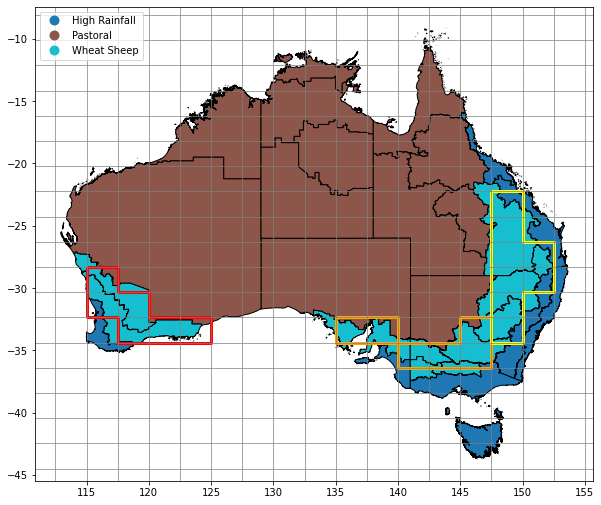

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

abares.plot(ax=ax,
            column='zone',
            legend=True,
            edgecolor='black',
            legend_kwds={'loc': 'upper left'} )

my_wheat_sheep.plot(ax=ax,
                    column='region',
                    edgecolor=['red', 'orange', 'yellow'],
                    facecolor='none',
                    linewidth=3)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

for lat in lat_bounds:
    if (lat > ymin) and (lat < ymax):
        ax.axhline(lat, color='0.5', linewidth=0.7)

for lon in lon_bounds:
    if (lon > xmin) and (lon < xmax):
        ax.axvline(lon, color='0.5', linewidth=0.7)

plt.show()

In [14]:
abares_wheat_sheep = abares[abares.zone == 'Wheat Sheep']
abares_wheat_sheep

,aagis,class,name,zone,geometry
1,121,121,NSW North West Slopes and Plains,Wheat Sheep,"POLYGON ((150.29716 -28.54252, 150.29783 -28.5..."
2,122,122,NSW Central West,Wheat Sheep,"POLYGON ((149.02819 -30.60890, 149.05246 -30.6..."
3,123,123,NSW Riverina,Wheat Sheep,"POLYGON ((145.34428 -32.68249, 145.33056 -32.7..."
6,221,221,VIC Mallee,Wheat Sheep,"POLYGON ((140.96768 -33.98983, 140.96827 -33.9..."
7,222,222,VIC Wimmera,Wheat Sheep,"POLYGON ((141.99493 -35.64500, 141.99495 -35.6..."
8,223,223,VIC Central North,Wheat Sheep,"POLYGON ((145.53410 -35.80522, 145.53390 -35.8..."
14,321,321,QLD Eastern Darling Downs,Wheat Sheep,"POLYGON ((151.24101 -26.52643, 151.24312 -26.5..."
15,322,322,QLD Western Downs and Central Highlands,Wheat Sheep,"POLYGON ((146.92819 -21.51004, 146.93123 -21.5..."
18,421,421,SA Eyre Peninsula,Wheat Sheep,"MULTIPOLYGON (((136.11366 -35.33342, 136.11484..."
19,422,422,SA Murray Lands and Yorke Peninsula,Wheat Sheep,"MULTIPOLYGON (((136.84612 -35.37357, 136.84525..."


In [15]:
lons = cafe['lon'].values
lats = cafe['lat'].values

abares_mask = regionmask.mask_geopandas(abares_wheat_sheep, lons, lats)
abares_3D_mask = regionmask.mask_3D_geopandas(abares_wheat_sheep, lons, lats)

In [16]:
abares_mask

<xarray.DataArray 'region' (lat: 90, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

In [17]:
abares_3D_mask

<xarray.DataArray 'region' (region: 11, lat: 90, lon: 144)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * region   (region) int64 1 2 3 6 7 14 15 18 19 23 24

In [18]:
# WA = 500
# SE = 600
# NE = 700

region_values = {1: 700,
                 2: 600,
                 3: 600,
                 6: 600,
                 7: 600,
                 8: 600,
                14: 700,
                15: 700,
                18: 600,
                19: 600,
                23: 500,
                24: 500}

In [19]:
abares_mask_reduced = abares_mask.copy()
for key, value in region_values.items():
    abares_mask_reduced = xr.where(abares_mask_reduced == key, value, abares_mask_reduced)

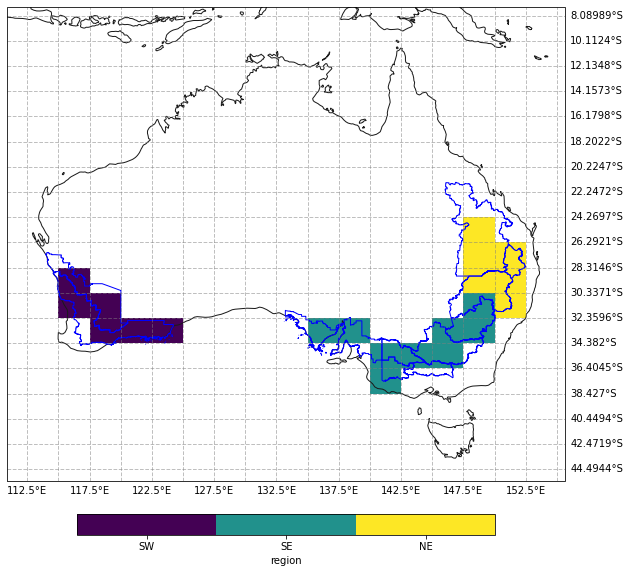

In [21]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw=dict(projection=proj))

h = abares_mask_reduced.plot(ax=ax,
                             transform=proj,
                             add_colorbar=False,
                             levels=np.array([450, 550, 650, 750]))
cbar = plt.colorbar(h, orientation='horizontal', shrink=0.75, pad=0.05)
cbar.set_ticks(np.array([500, 600, 700]))
cbar.set_ticklabels(['SW', 'SE', 'NE'])
cbar.set_label("region")

ax.set_extent((xmin, xmax, ymin, ymax), crs=ccrs.PlateCarree())
ax.coastlines(color="0.1")
ax.add_geometries(abares_wheat_sheep.geometry, crs=proj, facecolor='none', edgecolor='blue')

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

#for lat in lat_bounds:
#    if (lat > ymin) and (lat < ymax):
#        ax.axhline(lat, color='0.5', linewidth=0.7)

#for lon in lon_bounds:
#    if (lon > xmin) and (lon < xmax):
#        ax.axvline(lon, color='0.5', linewidth=0.7)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels = False
gl.xlocator = mticker.FixedLocator(lon_bounds)
gl.ylocator = mticker.FixedLocator(lat_bounds)
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

plt.show()

## Look at rainfall data

In [100]:
wa_points = [[-29, 116],
             [-31, 116],
             [-31, 118],
             [-33, 118],
             [-33, 121],
             [-33, 124]
            ]

se_points = [[-33, 136],
             [-33, 138],
             [-35, 141],
             [-37, 141],
             [-35, 144],
             [-35, 146],
             [-33, 146],
             [-33, 148],
             [-31, 148]
            ]

ne_points = [[-31, 151],
             [-29, 151],
             [-29, 148],
             [-27, 148],
             [-27, 151],
             [-25, 148],
             [-23, 148],
            ]

In [96]:
def plot_monthly_clim(awap_da, cafe_da, lat, lon):
    """Plot monthly climatology"""
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    
    cafe_sel = cafe_da.sel(lat=lat, lon=lon, method='nearest')
    cafe_sel = cafe_sel.mean('ensemble')
    cafe_sel.groupby('time.month').mean('time').plot(label='CAFE')
    
    awap_sel = awap_da.sel(lat=lat, lon=lon, method='nearest')
    awap_sel.groupby('time.month').mean('time').plot(label='AWAP')
    
    plt.legend()
    plt.show()

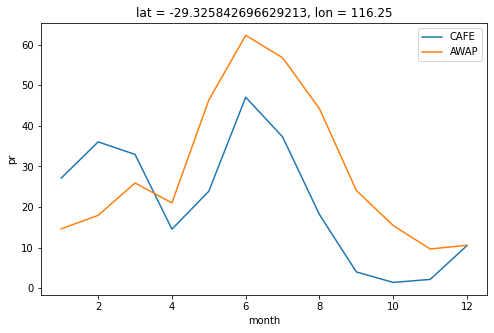

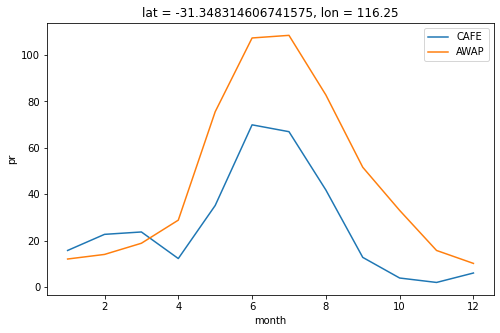

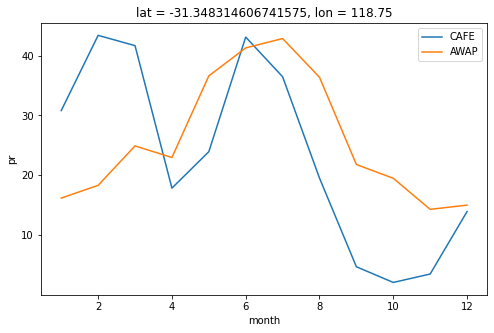

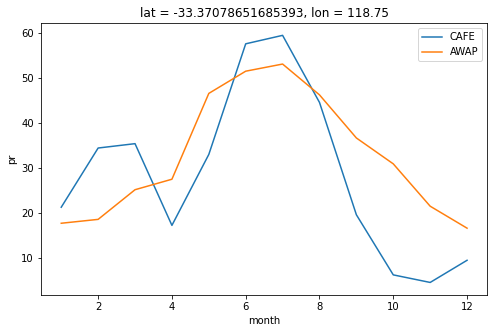

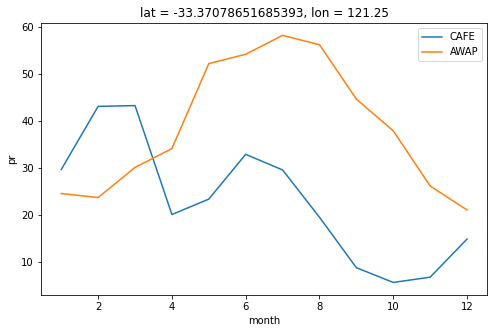

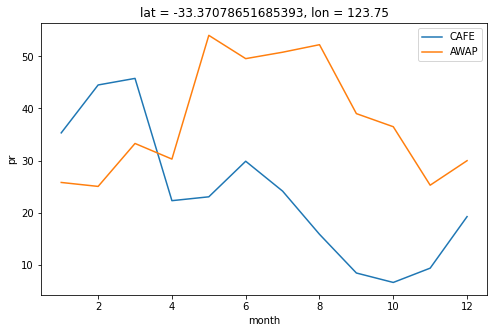

In [97]:
for lat, lon in wa_points:
    plot_monthly_clim(awap['pr'], cafe['pr'], lat, lon)

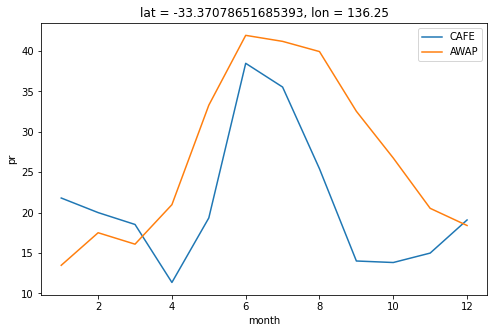

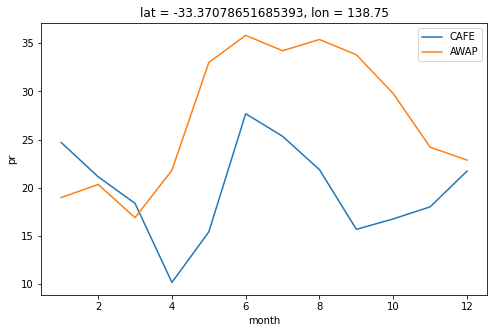

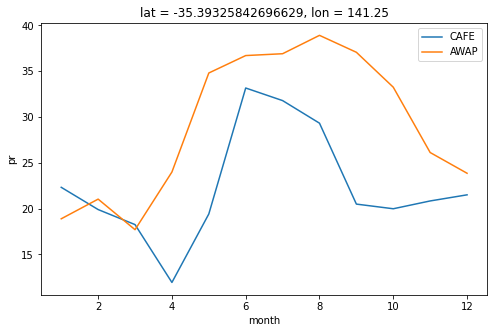

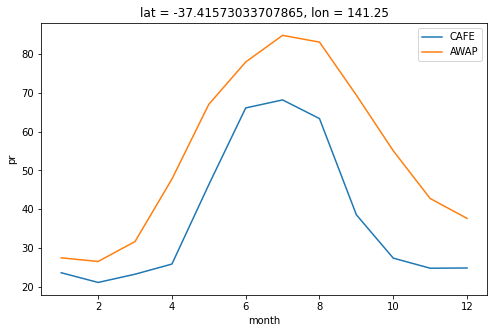

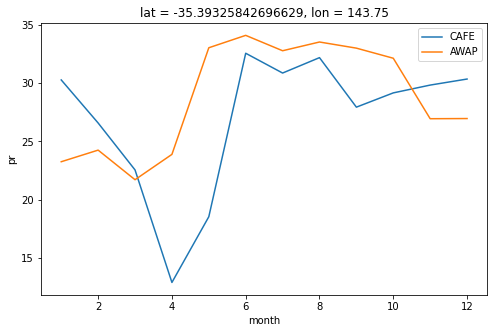

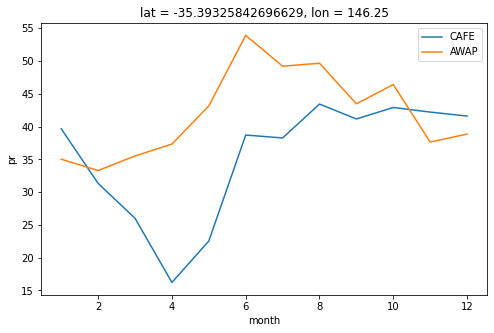

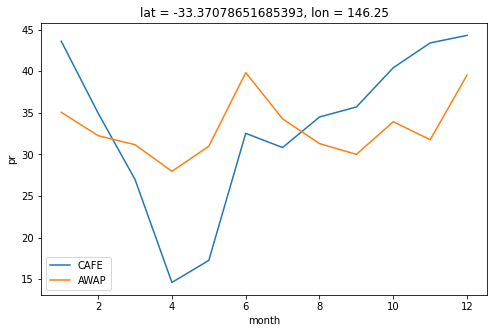

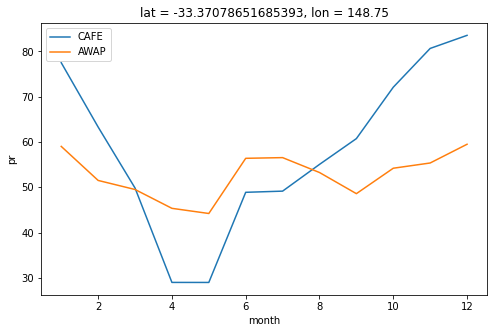

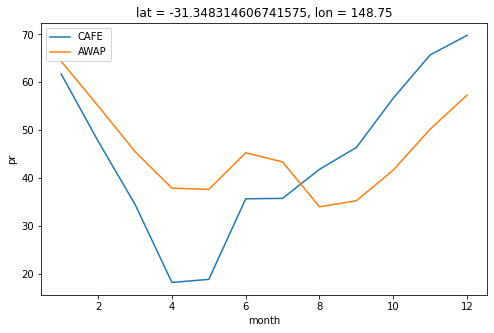

In [99]:
for lat, lon in se_points:
    plot_monthly_clim(awap['pr'], cafe['pr'], lat, lon)

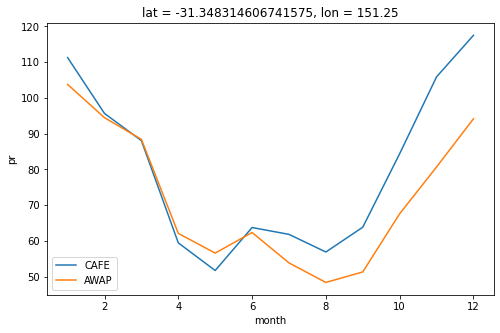

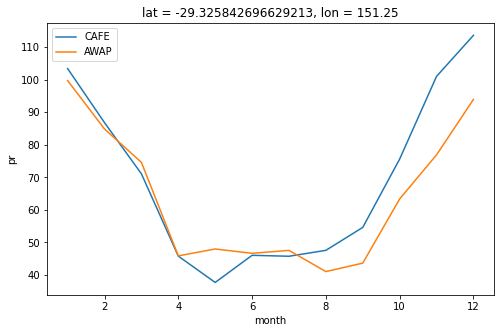

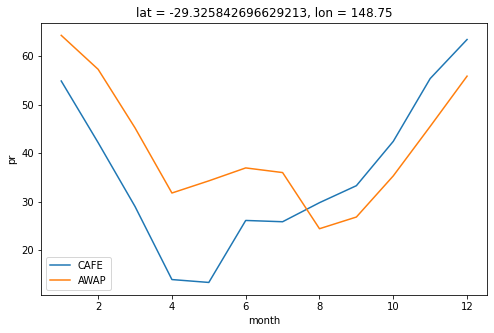

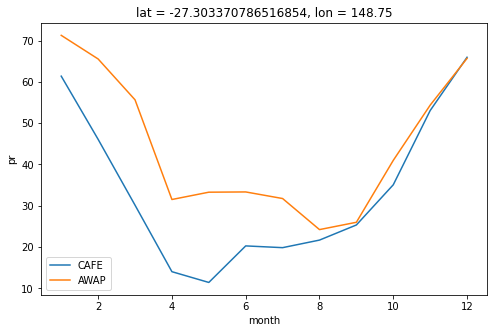

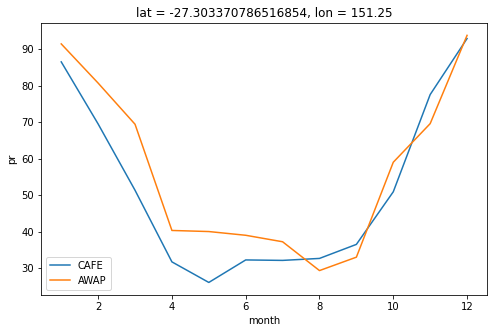

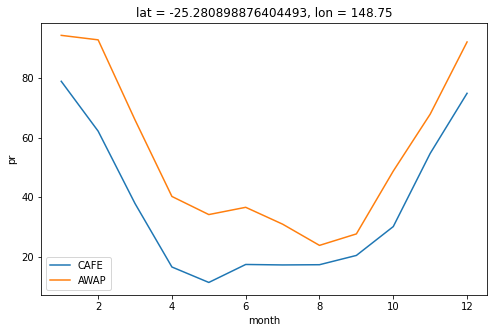

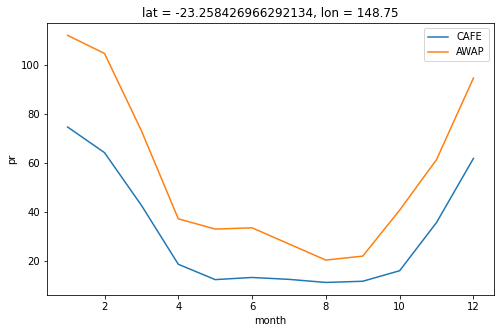

In [101]:
for lat, lon in ne_points:
    plot_monthly_clim(awap['pr'], cafe['pr'], lat, lon)

In [102]:
awap['lat']

<xarray.DataArray 'lat' (lat: 16)>
array([-41.460674, -39.438202, -37.41573 , -35.393258, -33.370787, -31.348315,
       -29.325843, -27.303371, -25.280899, -23.258427, -21.235955, -19.213483,
       -17.191011, -15.168539, -13.146067, -11.123596])
Coordinates:
  * lat      (lat) float64 -41.46 -39.44 -37.42 -35.39 ... -15.17 -13.15 -11.12

In [103]:
awap['lon']

<xarray.DataArray 'lon' (lon: 16)>
array([113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75, 131.25, 133.75,
       136.25, 138.75, 141.25, 143.75, 146.25, 148.75, 151.25])
Coordinates:
  * lon      (lon) float64 113.8 116.2 118.8 121.2 ... 143.8 146.2 148.8 151.2

#### South-West (SW) region

-29.325843, 116.25  Winter peak  
-31.348315, 116.25  Winter peak  
-31.348315, 118.75  Winter peak (AWAP), dual peak (CAFE)  
-33.370787, 118.75  Winter peak  
-33.370787, 121.25  Winter peak (AWAP), late summer peak (CAFE)  
-33.370787, 123.75  Winter peak (AWAP), late summer peak (CAFE)  

#### South-East (SE) region

-33.370787, 136.25  Winter peak  
-33.370787, 138.75  Winter peak, almost dual peak (CAFE)  
-35.393258, 141.25  Winter peak  
-37.41573,  141.25  Winter peak  
-35.393258, 143.75  Winter into spring peak  
-35.393258, 146.25  Winter into spring peak  
-33.370787, 146.25  Flat or mild dual peak (summer and winter; AWAP), summer peak (CAFE)  
  
-33.370787, 148.75  Flat or mild dual peak (summer and winter; AWAP), summer peak (CAFE)  
-31.348315, 148.75  Summer peak  

#### North-East (NE) region

-31.348315, 151.25  Summer peak  
-29.325843, 151.25  Summer peak  
-29.325843, 148.75  Summer peak  
-27.303371, 148.75  Summer peak  
-27.303371, 151.25  Summer peak  
-25.280899, 148.75  Summer peak  
-23.258427, 148.75  Summer peak  

## Regional means

In [52]:
awap_lons = cafe['lon'].values
awap_lats = cafe['lat'].values

my_awap_mask = regionmask.mask_geopandas(my_wheat_sheep, awap_lons, awap_lats)
my_awap_3D_mask = regionmask.mask_3D_geopandas(my_wheat_sheep, awap_lons, awap_lats)

In [53]:
awap_weights = np.cos(np.deg2rad(awap['lat']))
awap_regional_means = awap.weighted(my_awap_3D_mask * awap_weights).mean(dim=("lat", "lon"))

In [54]:
cafe_lons = cafe['lon'].values
cafe_lats = cafe['lat'].values

my_cafe_mask = regionmask.mask_geopandas(my_wheat_sheep, cafe_lons, cafe_lats)
my_cafe_3D_mask = regionmask.mask_3D_geopandas(my_wheat_sheep, cafe_lons, cafe_lats)

In [55]:
# unweighted
#cafe.groupby(my_cafe_mask).mean()

cafe_weights = np.cos(np.deg2rad(cafe['lat']))
cafe_regional_means = cafe.weighted(my_cafe_3D_mask * cafe_weights).mean(dim=("lat", "lon"))

In [56]:
cafe_regional_means

<xarray.Dataset>
Dimensions:   (ensemble: 96, region: 3, time: 120)
Coordinates:
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) object 1990-05-16 12:00:00 ... 2000-04-16 00:00:00
  * region    (region) int64 0 1 2
Data variables:
    pr        (time, ensemble, region) float64 dask.array<chunksize=(24, 96, 3), meta=np.ndarray>

In [57]:
def plot_regional_mean(awap_da, cafe_da, region):
    """Plot regional mean"""
    
    region_numbers = {'south-west': 0, 'south-east': 1, 'north-east': 2}
    region_number = region_numbers[region]
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    
    cafe_sel = cafe_da.sel(region=region_number).mean('ensemble')
    cafe_sel.groupby('time.month').mean('time').plot(label='CAFE')
    
    awap_sel = awap_da.sel(region=region_number)
    awap_sel.groupby('time.month').mean('time').plot(label='AWAP')
    
    plt.ylabel('average monthly rainfall total (mm)')
    plt.title(region)
    plt.legend()
    plt.show()

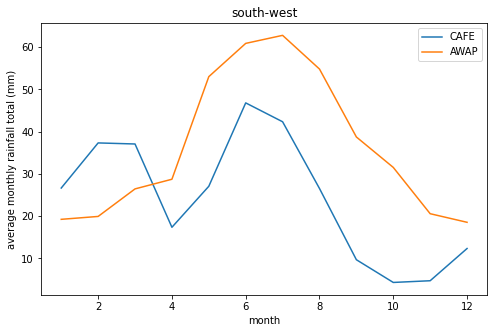

In [58]:
plot_regional_mean(awap_regional_means['pr'],
                   cafe_regional_means['pr'],
                   'south-west')

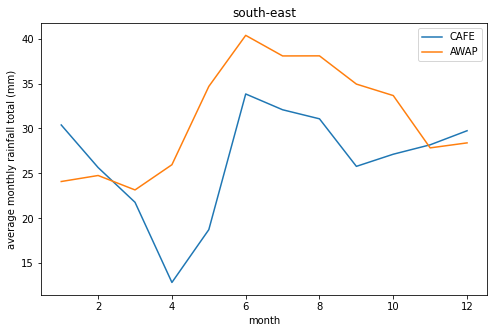

In [59]:
plot_regional_mean(awap_regional_means['pr'],
                   cafe_regional_means['pr'],
                   'south-east')

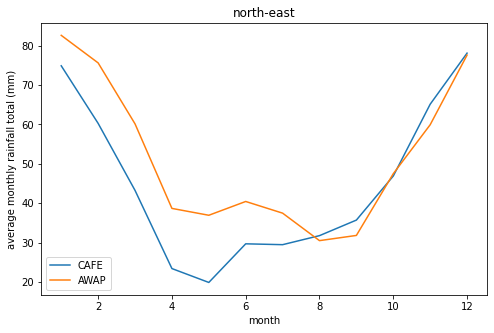

In [60]:
plot_regional_mean(awap_regional_means['pr'],
                   cafe_regional_means['pr'],
                   'north-east')